# Comparison between DFT and W90 bandstructures

In [1]:
# numerical module
import numpy as np

#setup plotting 
import matplotlib.pyplot as plt
plt.style.use('sci.mplstyle')

In [2]:
def read_band(fname, EFermi):
    bandData = np.loadtxt(fname)
    EF = EFermi
    kDist = np.unique(bandData[:, 0])
    numBand = len(bandData[bandData[:, 0] == kDist[1]])
    Bands = (np.reshape(bandData[:, 1], (-1, len(kDist))).T) - EF
    return kDist, Bands

In [3]:
# Fermi level
EF = -1.6773      # [eV]

# Band structure from the output of Wannier90
ks_w90, en_w90 = read_band('../w90/gr_band.dat', EF)

# Band structrue from the output of Quantum ESPRESSO
ks_dft, en_dft = read_band('../band/gr.bands.gnu', EF)
# Unit of k points from DFT (2*pi/a)
k2 = 2*np.pi/2.4639055825
# Convert the unit of ks_dft to 1/Angstrom
ks_k2 = np.asarray(ks_dft)*k2

# high-symmetry from w90 [1/Angstrom]
kNode = np.array([0.00000, 1.70003, 2.55005, 4.02233])

# label of high-symmetry
kLabel = (r'$\Gamma$', r'K', r'M', r'$\Gamma$')

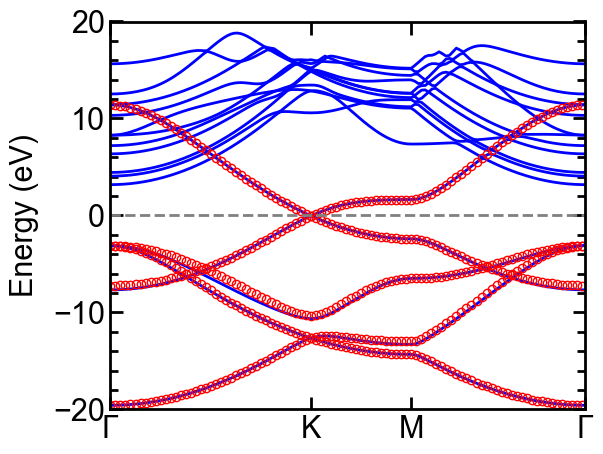

In [4]:
fig = plt.figure()

for i in range(en_dft.shape[1]):
    plt.plot(ks_k2, en_dft[:, i], color='blue', label='DFT')
    
for i in range(en_w90.shape[1]):
    plt.plot(ks_w90, en_w90[:, i], color='red', ls = 'none', marker='o', 
         markersize=6, markevery=5, markerfacecolor='none', label='W90')

plt.axhline(0.0, color='gray', ls='--')
# X-Axis
plt.xlabel('')
plt.xlim(kNode[0], kNode[-1])
# Add labels for high-symmetry points
plt.xticks(kNode, kLabel)
# Y-Axis
plt.ylabel('Energy (eV)')
plt.ylim(-20., 20.)

# Hide x-axis minor ticks
plt.tick_params(axis='x', which='minor', bottom=False, top=False)

plt.tight_layout()
fig.savefig('./band_dft_w90.png', dpi=600)
plt.show()

# Construct tight-binding model from `wannier90_hr.dat`

## Construct model

In [5]:
from pythtb import * # import TB model class

# read output from Wannier90 that should be in folder named "example_a"
# see instructions above for how to obtain the example output from 
# Wannier90

graphene = w90(r'../w90', 'gr')

# get tight-binding model without hopping terms above 0.01 eV and set Fermi level 
my_model = graphene.model(zero_energy=EF,min_hopping_norm=0.01)
my_model.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimension           = 3
number of spin components   = 1
periodic directions         = [0, 1, 2]
number of orbitals          = 5
number of electronic states = 5
lattice vectors:
 #  0  ===>  [  2.4639 ,     0.0 ,     0.0 ]
 #  1  ===>  [  -1.232 ,  2.1338 ,     0.0 ]
 #  2  ===>  [     0.0 ,     0.0 ,    15.0 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.6667 ,  0.1458 ]
 #  1  ===>  [  0.6667 ,  0.3333 , -0.0069 ]
 #  2  ===>  [  0.4999 ,  0.5001 ,     0.0 ]
 #  3  ===>  [  0.4999 , -0.0001 , -0.1111 ]
 #  4  ===>  [  0.0001 ,  0.5001 ,  0.0625 ]
site energies:
 #  0  ===>    0.3491
 #  1  ===>    0.3491
 #  2  ===>   -10.6846
 #  3  ===>   -10.6843
 #  4  ===>   -10.6845
hoppings:
<  0 | H |  1 + [  0 ,  0 ,  0 ] >     ===>  -2.8655 +     0.0 i
<  2 | H |  3 + [  0 ,  0 ,  0 ] >     ===>  -2.2263 +     0.0 i
<  2 | H |  4 + [  0 ,

## Bandstructure

In [6]:
# solve model on a path and plot it
path = [[0.0000, 0.0000, 0.0000], [0.3333, 0.3333, 0.0000], [0.5000, 0.0000, 0.0000], [0.0000, 0.0000, 0.0000] ]
# labels of the nodes
k_label = (r'$\Gamma$', r'K', r'M', r'$\Gamma$')

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path, 201)
# calculate the model
evals=my_model.solve_all(k_vec)

----- k_path report begin ----------
real-space lattice vectors
 [[ 2.46392  0.       0.     ]
 [-1.23196  2.13382  0.     ]
 [ 0.       0.      15.     ]]
k-space metric tensor
 [[0.21963 0.10981 0.     ]
 [0.10981 0.21963 0.     ]
 [0.      0.      0.00444]]
internal coordinates of nodes
 [[0.     0.     0.    ]
 [0.3333 0.3333 0.    ]
 [0.5    0.     0.    ]
 [0.     0.     0.    ]]
reciprocal-space lattice vectors
 [[0.40586 0.23432 0.     ]
 [0.      0.46864 0.     ]
 [0.      0.      0.06667]]
cartesian coordinates of nodes
 [[0.      0.      0.     ]
 [0.13527 0.2343  0.     ]
 [0.20293 0.11716 0.     ]
 [0.      0.      0.     ]]
list of segments:
  length = 0.27054  from  [0. 0. 0.]  to  [0.3333 0.3333 0.    ]
  length = 0.13527  from  [0.3333 0.3333 0.    ]  to  [0.5 0.  0. ]
  length = 0.23432  from  [0.5 0.  0. ]  to  [0. 0. 0.]
node distance list: [0.      0.27054 0.40582 0.64014]
node index list:    [  0  85 127 200]
----- k_path report end ------------



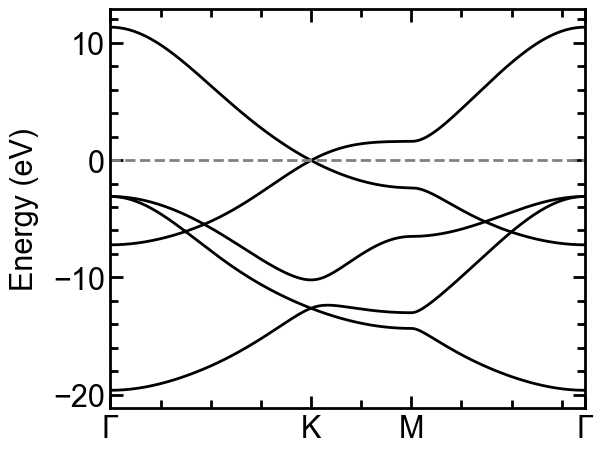

In [7]:
# plotting the tight-binding model
fig = plt.figure()
for i in range(evals.shape[0]):
    plt.plot(k_dist, evals[i], color='black')

plt.axhline(0.0, color='gray', ls='--')
# X-axis
plt.xlabel('')
plt.xlim(k_dist[0],k_dist[-1])
plt.xticks(k_node, k_label)
# Y-axis
plt.ylabel('Energy (eV)')

plt.tight_layout()
fig.savefig('./band_TB.png', dpi=600)
plt.show()